## Loading the libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading the dataset & Info

In [109]:
dataset = pd.read_csv('creditcard.csv')

In [110]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The above dataset has 28 features i.e. v1 to v28. Apart from this it has a time column and a amount column and then finally it has a class section where '0' is for safe transaction while '1' is for fraudulent transaction

In [111]:
len(dataset)

284807

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The above info tells us that we don't have a null value in our dataset

## Preprocessing data

In [113]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() ## works good with outliers

dataset['Amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['Time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1)) 

In [114]:
normal = dataset[dataset['Class']==0]
len(normal)

284315

In [115]:
fraudulent = dataset[dataset['Class']==1]
len(fraudulent)

492

So we have only 492 fraudulent cases out of 284807 which is about 0.173% of total data so its an unbalanced data hence our machine learning model won't be able to detect the fraudulent cases properply if we directly feed this data to our model

In [116]:
normal

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [117]:
fraudulent

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.307413,1
623,-0.989438,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,1
4920,-0.942563,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.045204,1
6108,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.517013,1
6329,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.293440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.992140,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.142178,1
280143,0.994549,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.296793,1
280149,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.780968,1
281144,1.001821,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.116048,1


In [118]:
normal.Amount.describe()

count    284315.000000
mean          0.926305
std           3.494796
min          -0.307413
25%          -0.228464
50%           0.000000
75%           0.769231
max         358.683155
Name: Amount, dtype: float64

In [119]:
fraudulent.Amount.describe()

count    492.000000
mean       1.400284
std        3.586715
min       -0.307413
25%       -0.293440
50%       -0.178160
75%        1.172221
max       29.398030
Name: Amount, dtype: float64

In [120]:
normal_new = normal.sample(n=492)

In [121]:
new_dataset = pd.concat([normal_new,fraudulent])
new_dataset = new_dataset.sample(frac=1)

new_dataset is the downscaled data

In [122]:
train_original, test_original = train_test_split(dataset, test_size=0.25, random_state=0)
train_downscaled, test_downscaled = train_test_split(new_dataset,test_size=0.25,random_state=0)

In [123]:
X_downscaled_train = train_downscaled.drop('Class',axis = 1)
Y_downscaled_train = train_downscaled['Class']
print(X_downscaled_train.shape,Y_downscaled_train.shape)

(738, 30) (738,)


In [124]:
X_original_train = train_original.drop('Class',axis = 1)
Y_original_train = train_original['Class']
print(X_original_train.shape,Y_original_train.shape)

(213605, 30) (213605,)


## Using Logistic Regression

In [125]:
X_original_test = test_original.drop('Class',axis = 1)
Y_original_test = test_original['Class']
Y_original_train.value_counts()

Class
0    213233
1       372
Name: count, dtype: int64

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

lr = LogisticRegression(solver='saga')
lr.fit(X_original_train, Y_original_train)

lr_predict = lr.predict(X_original_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [127]:
Y_original_test = test_original['Class']
recall_score(Y_original_test, lr_predict)

0.6083333333333333

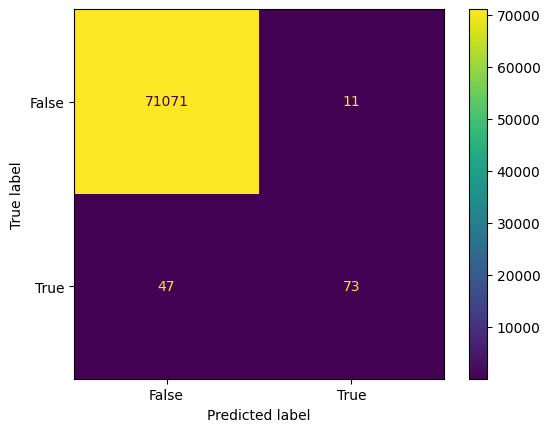

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf = confusion_matrix(Y_original_test, lr_predict)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [129]:
X_downscaled_test = test_downscaled.drop('Class',axis = 1)
Y_downscaled_test = test_downscaled['Class']

In [130]:
lr_new = LogisticRegression(solver='saga')
lr_new.fit(X_downscaled_train, Y_downscaled_train)

lr_new_predict = lr_new.predict(X_downscaled_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [131]:
recall_score(Y_downscaled_test, lr_new_predict)

0.8650793650793651

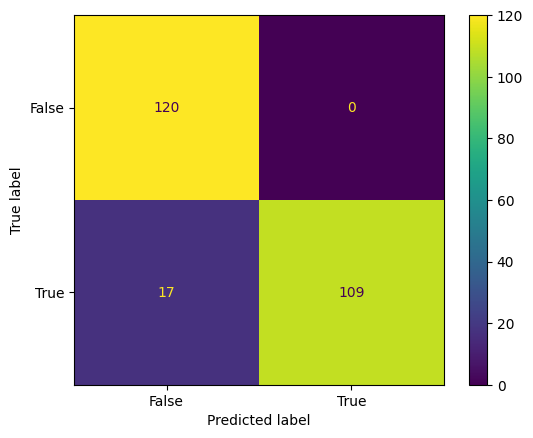

In [132]:
conf = confusion_matrix(Y_downscaled_test, lr_new_predict)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_original_train,Y_original_train)

knn_original_predict = knn.predict(X_original_test)

In [134]:
recall_score(Y_original_test,knn_original_predict)

0.7666666666666667

In [135]:
from sklearn.metrics import accuracy_score

In [136]:
accuracy_score(Y_original_test,knn_original_predict)

0.9995084407741356

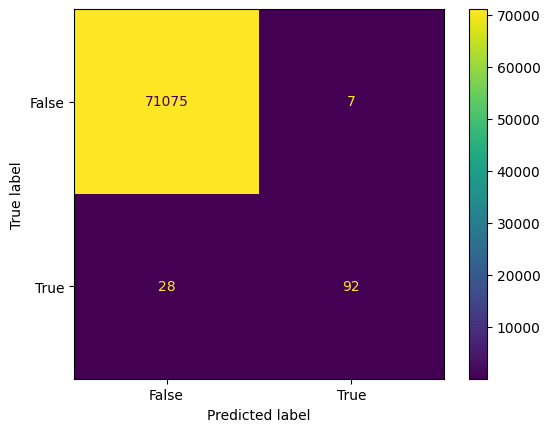

In [140]:
conf = confusion_matrix(Y_original_test, knn_original_predict)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [137]:
knn_down = KNeighborsClassifier(n_neighbors=5)
knn_down.fit(X_downscaled_train,Y_downscaled_train)

knn_down_predict = knn_down.predict(X_downscaled_test)

In [138]:
recall_score(Y_downscaled_test,knn_down_predict)

0.8412698412698413

In [139]:
accuracy_score(Y_downscaled_test,knn_down_predict)

0.9105691056910569

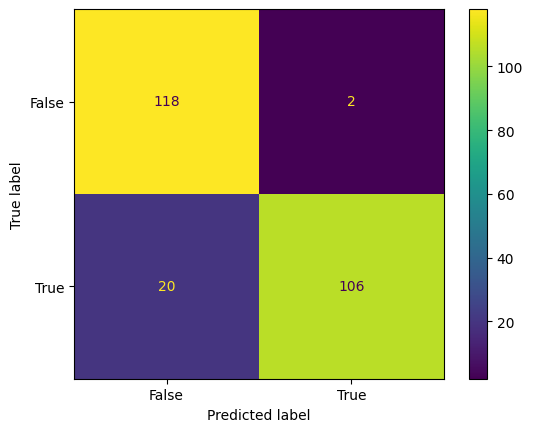

In [142]:
conf = confusion_matrix(Y_downscaled_test, knn_down_predict)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [154]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
DT.fit(X_original_train,Y_original_train)

DT_original_predict = DT.predict(X_original_test)

In [155]:
recall_score(Y_original_test,DT_original_predict)

0.8

In [156]:
accuracy_score(Y_original_test,DT_original_predict)

0.9994382180275835

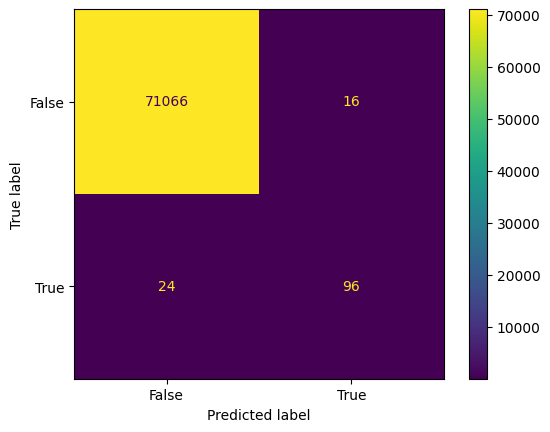

In [157]:
conf = confusion_matrix(Y_original_test, DT_original_predict)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [158]:
DT_down = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
DT_down.fit(X_downscaled_train,Y_downscaled_train)

DT_down_predict = DT_down.predict(X_downscaled_test)

In [159]:
recall_score(Y_downscaled_test,DT_down_predict)

0.8412698412698413

In [160]:
accuracy_score(Y_downscaled_test,DT_down_predict)

0.8739837398373984

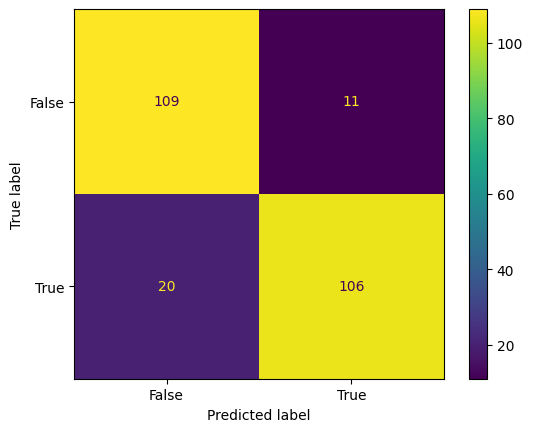

In [161]:
conf = confusion_matrix(Y_downscaled_test, DT_down_predict)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [3, 6]
}

rf = RandomForestClassifier()
grid_clf = GridSearchCV(rf, param_grid, cv=5)
grid_clf.fit(X_original_train, Y_original_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6], 'n_estimators': [5, 10, 20]})

In [163]:
grid_clf.best_params_

{'max_depth': 6, 'n_estimators': 20}

In [166]:
rf = RandomForestClassifier(max_depth=6, n_estimators=10, verbose=2)
rf.fit(X_original_train, Y_original_train)
rf_predict_original = rf.predict(X_original_test)

recall_score(Y_original_test, rf_predict_original)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.725

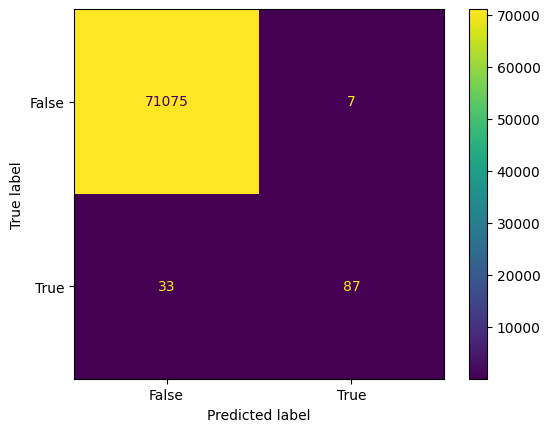

In [168]:
conf = confusion_matrix(Y_original_test, rf_predict_original)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [169]:
rf_down = RandomForestClassifier()
grid_clf = GridSearchCV(rf_down, param_grid, cv=5)
grid_clf.fit(X_downscaled_train, Y_downscaled_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6], 'n_estimators': [5, 10, 20]})

In [170]:
grid_clf.best_params_

{'max_depth': 6, 'n_estimators': 20}

In [171]:
rf_down = RandomForestClassifier(max_depth=6, n_estimators=10, verbose=2)
rf_down.fit(X_downscaled_train, Y_downscaled_train)
rf_predict_down = rf.predict(X_downscaled_test)

recall_score(Y_downscaled_test, rf_predict_down)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.6984126984126984

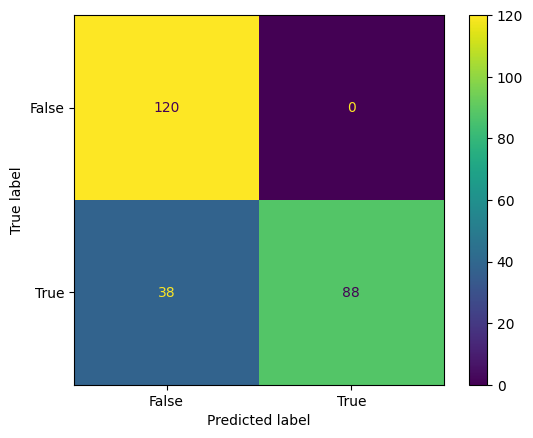

In [172]:
conf = confusion_matrix(Y_downscaled_test, rf_predict_down)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf, display_labels = [False, True])

cm_display.plot()
plt.show() 